In [1]:
from gpt import GPT
from distgen import Generator
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update(
    {"font.size": 20, "lines.linewidth": 2.5, "figure.figsize": (10, 6)}
)
from scipy.io import loadmat

In [2]:
exp_1xt = loadmat(
    "/nfs/bbl/online/epics/ScriptsB24/SolenoidScan/data_04-06-2021/1st_screen_final2/s.mat"
)
exp_3rd = loadmat(
    "/nfs/bbl/online/epics/ScriptsB24/SolenoidScan/data_03-25-2021/500um/s.mat"
)

In [3]:
# Uniform initial distribution
gen = Generator("beamline/uniform.in.yaml", verbose=0)
gen["start:MTE:value"] = 100
gen["r_dist:max_r:value"] = 1.

transx = {"type": "translate x", "delta":{"value":6, "units":"mm"}}
transz = {"type": "translate z", "delta":{"value":0.1, "units":"mm"}}
gen.input["transforms"] = {"t1":transz, "order": ["t1"]}

gen.run()
print(gen)

<disgten.Generator with input: 
n_particle: 10000
output:
  file: rad.uniform.out.txt
  type: gpt
r_dist:
  max_r:
    units: mm
    value: 1.0
  min_r:
    units: mm
    value: 0
  type: radial_uniform
random_type: hammersley
start:
  MTE:
    units: meV
    value: 100
  type: cathode
t_dist:
  max_t:
    units: ps
    value: 150
  min_t:
    units: ps
    value: -150
  type: uniform
total_charge:
  units: pC
  value: 15
transforms:
  order:
  - t1
  t1:
    delta:
      units: mm
      value: 0.1
    type: translate z

>


In [10]:
## Scan

# Set scan range
zoff = np.linspace(-0.5, 0.5, num =3)
sol_current = np.linspace(1, 4, num=10)
sig_x = np.zeros((len(zoff), len(sol_current)))

# Start Loop
for zind in range(len(zoff)):
    print(zind)
    gen["transforms:t1:delta:value"] = float(zoff[zind])
    gen.run()
    G = GPT(input_file="beamline/beamline.in", initial_particles=gen.particles)
    
    # scan current
    for cur_ind in range(len(sol_current))
        G.set_variables({"sol01_current": sol_current[cur_ind]})
        G.run()
        sig_x[zind, cur_ind] = G.stat("sigma_x","screen")[0]

0.0
0.25
0.5


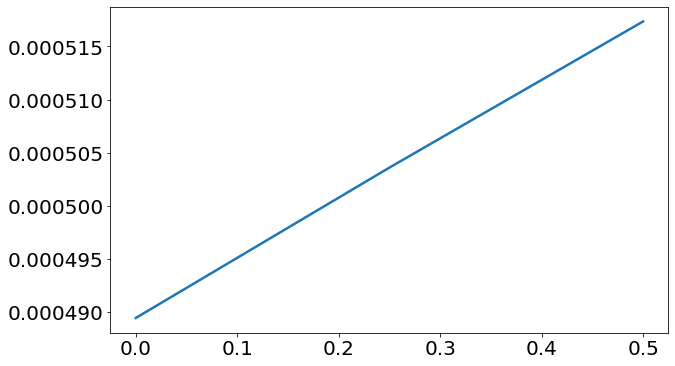

In [11]:
plt.plot(zoff, sig_x, label=r"simulation $\sigma_x$")

In [12]:
gen

<disgten.Generator with input: 
n_particle: 10000
output:
  file: rad.uniform.out.txt
  type: gpt
r_dist:
  max_r:
    units: mm
    value: 1.0
  min_r:
    units: mm
    value: 0
  type: radial_uniform
random_type: hammersley
start:
  MTE:
    units: meV
    value: 100
  type: cathode
t_dist:
  max_t:
    units: ps
    value: 150
  min_t:
    units: ps
    value: -150
  type: uniform
total_charge:
  units: pC
  value: 15
transforms:
  order:
  - t1
  t1:
    delta:
      units: mm
      value: 0.5
    type: translate z

>